In [1]:
# import data libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import gdal
import rasterio
print("Data libraries imported!")
# import visualization libraries
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print("Visualization libraries imported!")


Data libraries imported!
Visualization libraries imported!


In [3]:
# reading tif file for 3D plot attempt
geo = gdal.Open("coredata/DHMVIIDSMRAS1m_k05.tif")

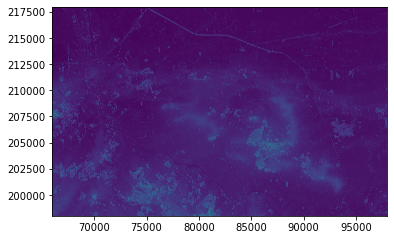

BoundingBox(left=66000.0, bottom=198000.0, right=98000.0, top=218000.0)

In [2]:
# plotting call is commented out for faster runtime and
# access to object attributes for further analysis and
# planning next steps.

import rasterio
import rasterio.plot as rplot
image = rasterio.open("coredata/DHMVIIDSMRAS1m_k13/GeoTIFF/DHMVIIDSMRAS1m_k13.tif")
rplot.show(image)
image.bounds

In [2]:
with rasterio.open("coredata/DHMVIIDSMRAS1m_k13/GeoTIFF/DHMVIIDSMRAS1m_k13.tif") as src:
    geography = src.read(1)
import plotly.graph_objects as go
import plotly.express as px

fig = px.imshow(geography)
# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# # fig.write_html('first_figure.html', auto_open=True)
# fig.show()

------------------------------------------------------
# Divider
------------------------------------------------------

In [3]:
type(image)
# Anyone know how to decipher this output from a DatasetReader object (rasterio's object name) crs attribute? 
# ```python
# CRS.from_wkt
# ('LOCAL_CS[
#     "Belge 1972 / Belgian Lambert 72",
#     GEOGCS["Belge 1972",DATUM
#         ["unknown",
#         SPHEROID["unretrievable - using WGS84",6378137,298.257223563],  
#         TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747] 
#         ],   
#     PRIMEM["Greenwich",0],  
#     UNIT["degree",0.0174532925199433]
#     ],
#     AUTHORITY["EPSG","31370"],   
#     UNIT["metre", 1, AUTHORITY["EPSG","9001"]]
#             ]'
# )```


NameError: name 'image' is not defined

In [5]:
image.transform  * (0, 0)

(66000.0, 218000.0)

In [6]:
image.crs


CRS.from_wkt('LOCAL_CS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["unknown",SPHEROID["unretrievable - using WGS84",6378137,298.257223563],TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],AUTHORITY["EPSG","31370"],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [ ]:
# Bruges: 51.2093° N, 3.2247° E
from pyproj import Proj, transform

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:31370')
x1,y1 = 51.2093,3.2247
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

# There seems to be something wrong:
# QGIS shows me coordinates in a different but
# nearby range. Part of the 'how to convert to
# used CRS' todo is fixing this issue.
